# The Spark Foundation

# Data Science & Business Analytics

# Task 4: Exploratory Data Analysis - Terrorism

# Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

# Presented By: Aishwarya Bapu Pisare

In [7]:
cd C:\Users\pooja\Documents

C:\Users\pooja\Documents


In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',low_memory=False ,encoding='latin1')

# Data Cleaning

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

###### there are so many null values so we need to consider only important columns

 data.isnull().sum().sort_values(ascending=False)

##### Let's change our columns name for our convinience

In [14]:
# Renaming columns for easy understanding
data.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','weapdetail':'Weapon_detail','motive':'Motive','city':'City'
                               ,'latitude':'Latitude','longitude':'Longitude'},inplace=True)
data.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### select only important columns

In [15]:
data=data[['Year','Month','Extended','Day','Country','success','suicide','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [16]:
dup=data[data.duplicated()]
dup.shape

(9458, 21)

In [17]:
data.drop_duplicates(inplace=True)
dup=data[data.duplicated()]
dup.shape

(0, 21)

In [18]:
data.shape

(172233, 21)

##### Total 6598 times Suicide bomb attcked

In [19]:
data['suicide'].value_counts()

0    165635
1      6598
Name: suicide, dtype: int64

##### Iraq and Pakistan coutries suffered more by Terrist attack

In [20]:
# Identifying Countries that have been most attacked 
data.Country.value_counts().head(15)

Iraq              23459
Pakistan          13797
Afghanistan       12515
India             11586
Colombia           7505
Philippines        6771
Peru               5053
United Kingdom     5000
El Salvador        4306
Somalia            4121
Turkey             4088
Nigeria            3829
Thailand           3740
Yemen              3305
Spain              3078
Name: Country, dtype: int64

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


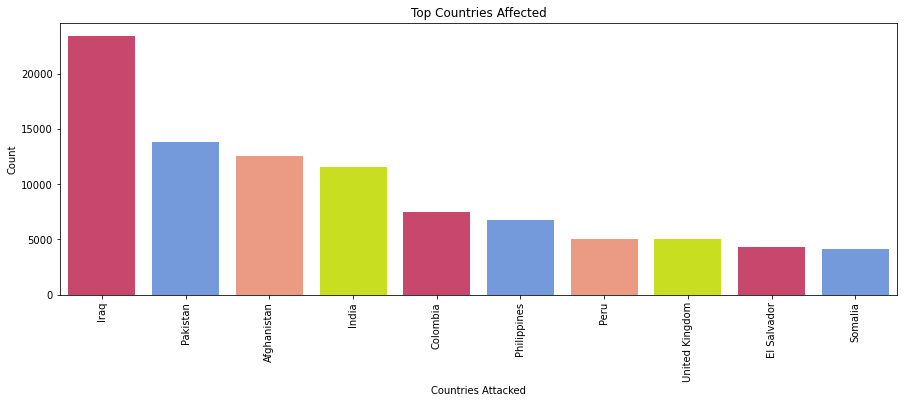

In [21]:
# top 10 attacked countries
plt.figure(figsize = (15,5))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette=["#de3163","#6495ed","#fc9272", "#DFFF00"])
plt.title('Top Countries Affected')
plt.xlabel('Countries Attacked')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


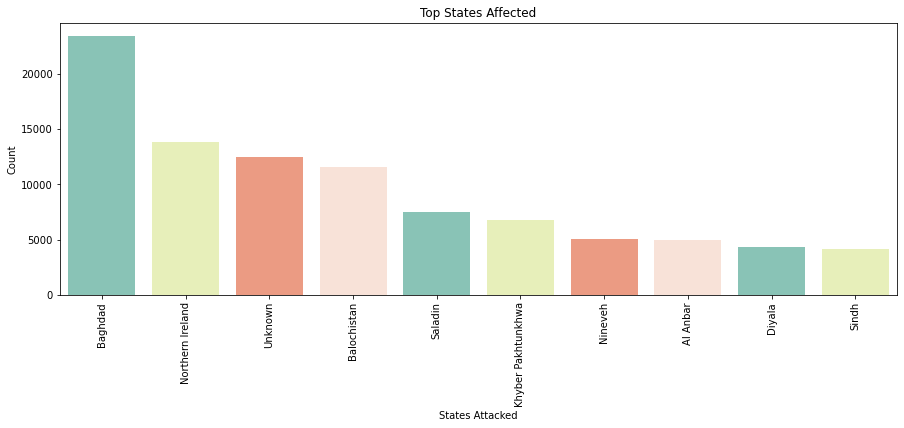

In [22]:
# Visualizing the top 10 attacked states
plt.figure(figsize = (15,5))
sns.barplot(data['State'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette=["#7fcdbb","#edf8b1","#fc9272", "#fee0d2"])
plt.title('Top States Affected')
plt.xlabel('States Attacked')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


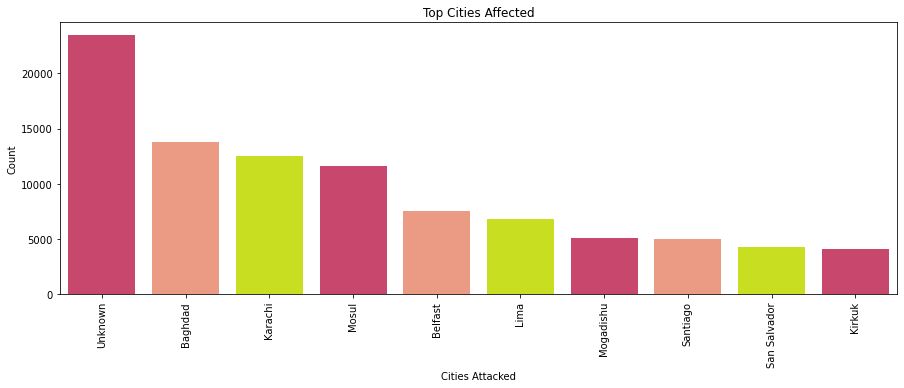

In [23]:
# top 10 attacked states
plt.figure(figsize = (15,5))
sns.barplot(data['City'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette=["#de3163","#fc9272", "#DFFF00"])
plt.title('Top Cities Affected')
plt.xlabel('Cities Attacked')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Top 10 country affected by Terrorism

In [24]:
data.groupby('Country')['Killed'].sum().sort_values(ascending=False)[:10]

Country
Iraq           78346.0
Afghanistan    39153.0
Pakistan       23518.0
Nigeria        22449.0
India          19165.0
Sri Lanka      15291.0
Syria          15044.0
Colombia       14087.0
Peru           12552.0
El Salvador    11963.0
Name: Killed, dtype: float64

<AxesSubplot:xlabel='Country'>

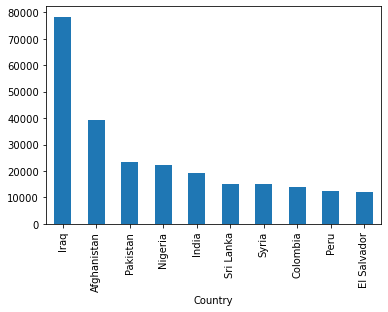

In [25]:
data.groupby('Country')['Killed'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Attacks in year (1970-2017)')

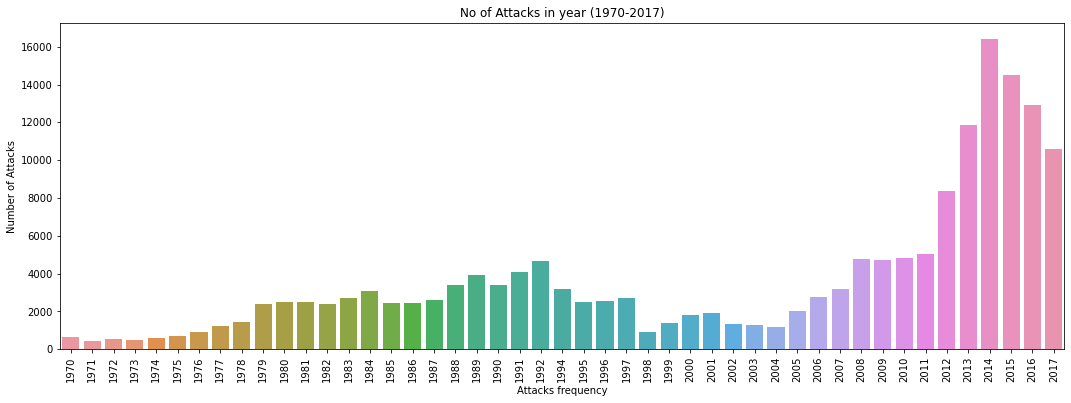

In [26]:
# Countplot of attacks in recent years
plt.figure(figsize=(18,6))
sns.countplot(data['Year'])
plt.xlabel("Attacks frequency")
plt.xticks(rotation=90)
plt.ylabel("Number of Attacks")
plt.title("No of Attacks in year (1970-2017)")

# weapons Used

Text(0.5, 1.0, 'Types of Weapons')

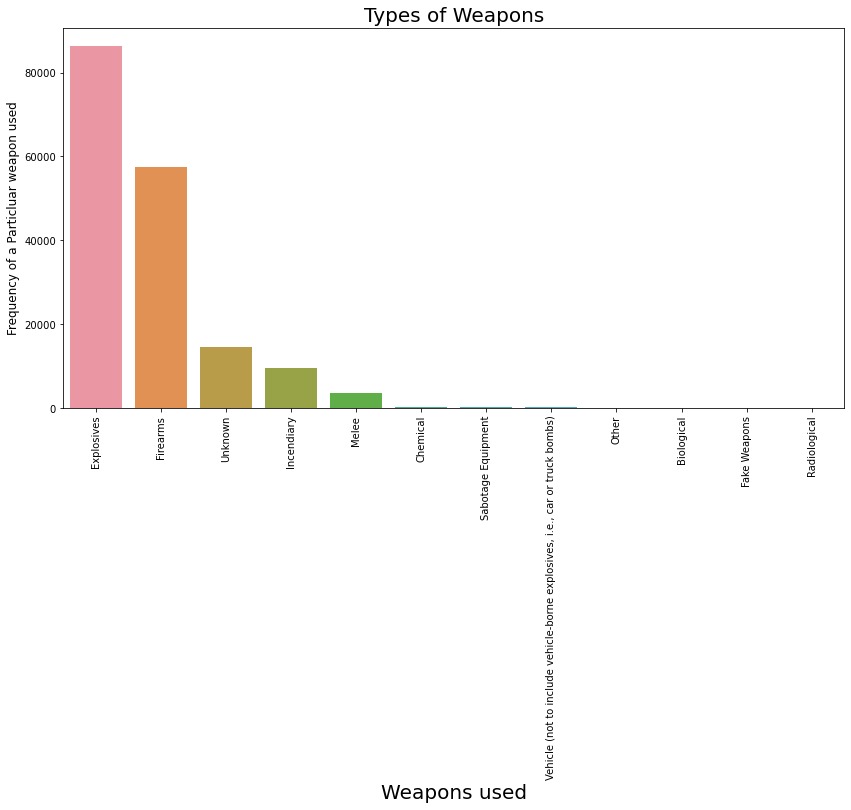

In [27]:
# barplot of waepons used
plt.figure(figsize=(14,7))
sns.barplot(x= data["Weapon_type"].value_counts()[:50].index,y = data["Weapon_type"].value_counts()[:50].values)
plt.xlabel("Weapons used", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Frequency of a Particluar weapon used", fontsize=12)
plt.title("Types of Weapons", fontsize=20)

# Attack Type

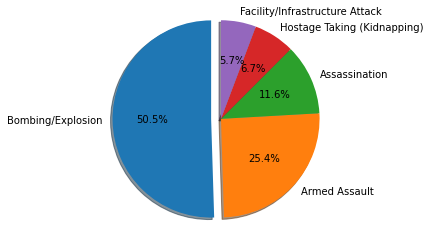

In [28]:
label1=data['AttackType'].value_counts()[:5].index
size=data['AttackType'].value_counts()[:5].values
explode = (0.1, 0, 0, 0,0) 
fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=label1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


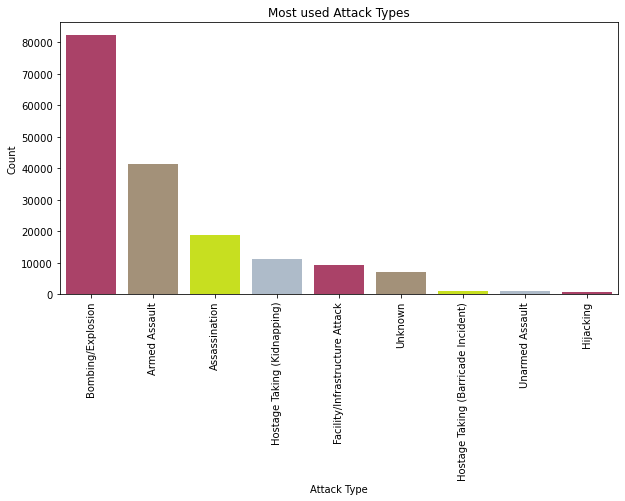

In [29]:
# Visualizing the Attack types
plt.figure(figsize = (10,5))
sns.barplot(data['AttackType'].value_counts()[:10].index,data['AttackType'].value_counts()[:10].values,palette=["#bb3163","#aa9272", "#DFFF00",'#aabbcd'])
plt.title('Most used Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


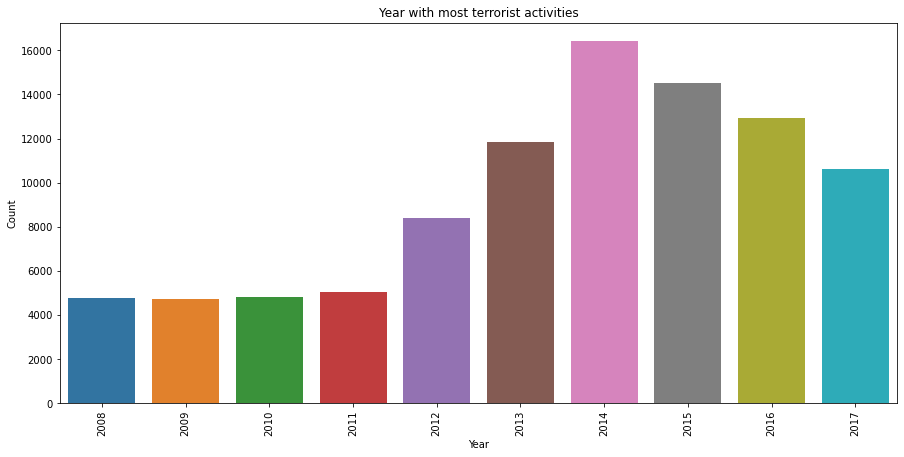

In [30]:
# Visualzing the  Top 10 years with maximum attacks
plt.figure(figsize = (15,7))
sns.barplot(data['Year'].value_counts()[:10].index,data['Year'].value_counts()[:10].values)
plt.title('Year with most terrorist activities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

# Conclusion

Most number of attacks occured after year with peak in


Is the country which has faced most terrorism than other countries.

Is the most attacked location across all states.

Bombing or Explosion is most frequent attacks.

Explosives and firearms are the most used weapons in attacks

Middle-East and North Africa and South Asia are the regions with most no. of Attacks.

78346 people get killed in Iraq